## Classify Even Numbers



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("training images shapes: ", x_train.shape)
print("testing images shapes: ", x_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targers shapes: ", y_test.shape)

training images shapes:  (60000, 28, 28)
testing images shapes:  (10000, 28, 28)
training targets shapes:  (60000,)
testing targers shapes:  (10000,)


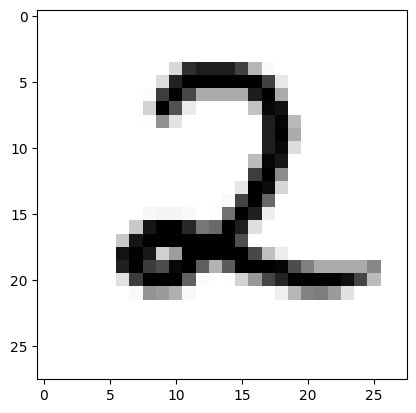

In [11]:
even_filter_train = (y_train % 2 == 0)  # Filter for even labels in training set
even_filter_test = (y_test % 2 == 0)    # Filter for even labels in test set

x_train_even = x_train[even_filter_train]
y_train_even = y_train[even_filter_train]
x_test_even = x_test[even_filter_test]
y_test_even = y_test[even_filter_test]

random_index = np.random.randint(0, x_train_even.shape[0])

plt.imshow(x_train_even[random_index], cmap=plt.cm.gray_r, interpolation="nearest")

### Prepare the data

### slicing

In [12]:
from sklearn.preprocessing import StandardScaler

x_train_even_flat = x_train_even.reshape(x_train_even.shape[0], -1)
x_test_even_flat = x_test_even.reshape(x_test_even.shape[0], -1)

scaler = StandardScaler()
x_train_even_flat = scaler.fit_transform(x_train_even_flat)
x_test_even_flat = scaler.transform(x_test_even_flat)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_even_flat)
x_train_pca_df = np.column_stack((x_train_pca, y_train_even))


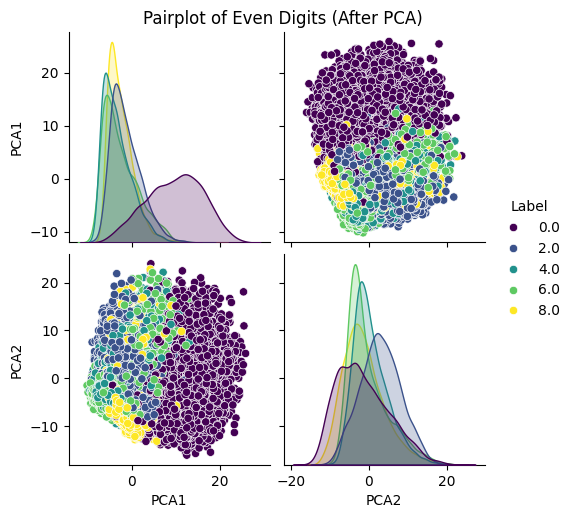

In [14]:
import pandas as pd
import seaborn as sns

pairplot_df = pd.DataFrame(x_train_pca_df, columns=['PCA1', 'PCA2', 'Label'])

sns.pairplot(pairplot_df, hue='Label', diag_kind='kde', palette='viridis')
plt.suptitle("Pairplot of Even Digits (After PCA)", y=1.02)
plt.show()


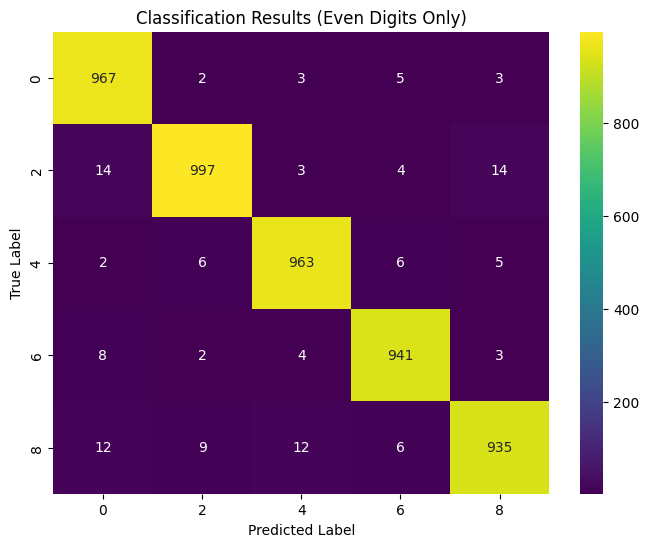

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_even_flat, y_train_even)
y_pred_even = knn.predict(x_test_even_flat)


cm = confusion_matrix(y_test_even, y_pred_even)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=np.unique(y_test_even),
            yticklabels=np.unique(y_test_even))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Classification Results (Even Digits Only)")
plt.show()
